In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [2]:
df = pd.read_excel("Telco_customer_churn.xlsx")
df.to_csv("Telco_customer_churn", index=False)

In [3]:
df = df.drop(columns=["CustomerID","Lat Long","Churn Label","Churn Reason"])

In [4]:
df["Total Charges"]=pd.to_numeric(df["Total Charges"],errors="coerce")
df=df.dropna()

In [6]:
cat_cols=df.select_dtypes(include="object").columns
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [7]:
X = df.drop(columns=["Churn Value"])
y = df["Churn Value"]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [10]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train,y_train)
y_pred_log=log_reg.predict(X_test)


In [11]:
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [14]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)

C:\Users\Mihir's Latitude\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
def evaluate_model (y_test, y_pred, model_name):
    print(f"---{model_name}---")
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Classification Report:\n",classification_report(y_test, y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
    print("\n")

    evaluate_model(y_pred, y_pred_log, "Logistic Regression")
    evaluate_model(y_pred, y_pred_rf, "Random Forest")
    evaluate_model(y_pred, y_pred_xgb, "XGBoost")

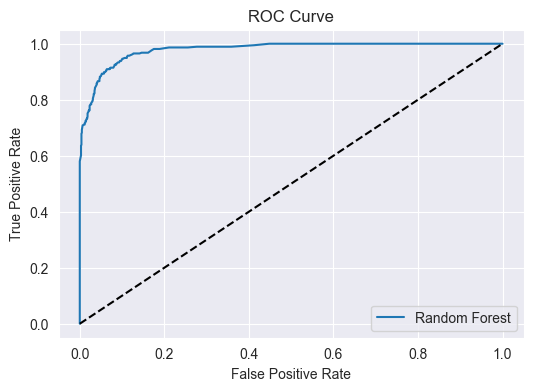

In [16]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

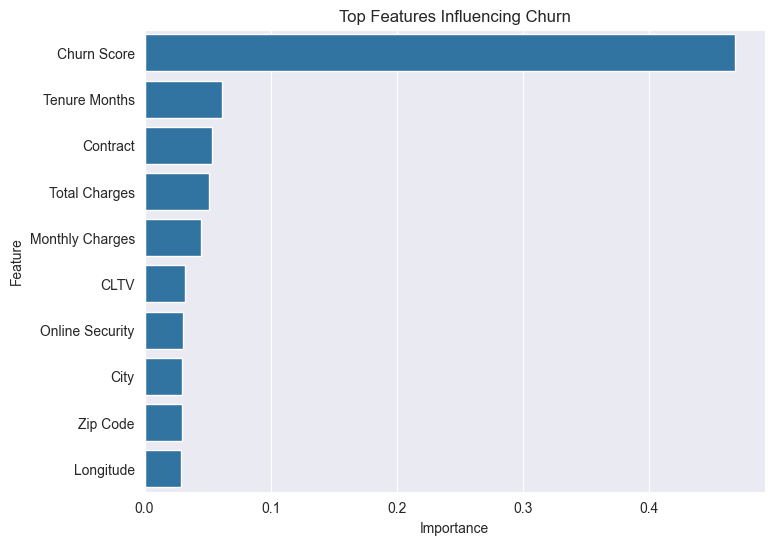

In [17]:
features = X.columns
importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10))
plt.title("Top Features Influencing Churn")
plt.show()
